#  This is assignment04

# Name:PENG CIYUAN 

# Student ID:2018220161 

# Link: https://github.com/pcyyyy/assignment04.git

# import packages for plotting graphs and manipulating data: 

In [1]:
import pandas as pd 
import random
import numpy as np
from matplotlib import pyplot as plt

# Define the color of graphs

In [2]:
colors=["#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
"#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
"#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
"#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
"#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F",
"#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09",
"#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66",
"#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C",
"#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81",
"#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00",
"#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700",
"#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329",
"#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C"]


# Design the K-means algorithm task

In [3]:
class MyKmeans:
    data=[]
    clusters=[]
    clusterIndex=[]
    points=[]
    k=0
    def readData(self,filename,exper=0):
        self.data = pd.read_csv(filename,header=None)
        if exper==2:
            for i in range(10):
                if(i != 2 and i!=4 and i != 6 and i!= 7):
                    self.data = self.data[self.data[1]!=i]
                    print (self.data)
        elif exper==3:
            for i in range(10):
                if(i != 6 and i!= 7):
                    self.data = self.data[self.data[1]!=i]
                    print (self.data)
        self.points=np.array(list(zip(self.data[2].values,self.data[3].values)))


    def cluster(self,iterCount,k,centroids=[]):
        self.k = k
        C=[] 
        if(centroids):
            x=[]
            y=[]
            for i in centroids:
                x.append(self.data[2].values[i])
                y.append(self.data[3].values[i])  
            C=np.array(list(zip(x,y)))
        else:
            randomIndex = random.sample(range(len(self.data)),k)
            x=[]
            y=[]
            for i in randomIndex:
                x.append(self.data[2].values[i])
                y.append(self.data[3].values[i])
            C=np.array(list(zip(x,y)))

        clusters=np.zeros(len(self.data))
        for i in range(iterCount):
            for j in range(len(self.points)):
                distances=np.linalg.norm(self.points[j]-C,axis=1)
                index = np.argmin(distances)
                clusters[j] = index
            for j in range(k):
                cluster=[]
                for x in range(len(self.points)):
                    if(clusters[x] == j):
                        cluster.append(self.points[x])
                        C[j] = np.mean(cluster,axis=0)
        self.clusterIndex=clusters
        result=[0]*k
        for i in range(k):
        result[i] = []
        matches = np.where(clusters==i)
            for match in matches:
                result[i].append(self.data[0].values[match])
        self.clusters = result
        return result

    def avgDistance(self,id,clusterId, clusters):
        clusterArray = clusters[int(clusterId)]
        clusterPoints = [np.array(self.points[j]) for j in clusterArray]
        return np.mean(np.linalg.norm(self.points[id]-clusterPoints[0],axis=1))


    def calculateSC(self,clusters):
        sc = 0
        for i in range(len(self.clusterIndex)):
            clusterId = self.clusterIndex[i]
            A = self.avgDistance(i,clusterId,clusters)
            B = min([self.avgDistance(i,j,clusters) for j in range(self.k) if j != clusterId])
            sc = sc + ((B-A)/max(A,B))
        sc = sc/len(self.data)
        return sc

    def plotData(self):
        labels = np.array(self.data[1])
        for i in range(10):
            locations = np.where(labels == i)
            x = [self.data[2].values[j] for j in locations]
            y = [self.data[3].values[k] for k in locations]	
            plt.plot(x[0],y[0],'+',label="digit %d"%(i))
        plt.legend()
        plt.show(block=False)
        return


    def plotCluster(self):
        for i in range(self.k):
            clusterArray = self.clusters[i]
            clusterPoints = [np.array(self.points[j]) for j in clusterArray]
            x = [clusterPoints[0][k][0] for k in range(len(clusterPoints[0]))]
            y = [clusterPoints[0][k][1] for k in range(len(clusterPoints[0]))]
            plt.plot(x,y,'+',label="digit %d"%(i))
        plt.legend()
        plt.show(block=False)
        return

# Clustering Tasks:define kValues

In [4]:
kValues=[2,4,8]

# Clustering Tasks

In [5]:
def expriment(kMeans):
    averages={}
    for i in kValues:
        averages[i]=[]
        print ("K Size %d" % (i))
        for j in range(10):
            print ("trial %d" % (j)) 
            averages[i].append(kMeans.calculateSC(kMeans.cluster(i,10)))
        averages[i] = np.mean(averages[i])
    plt.plot(averages.keys(),averages.values())
    plt.show(block=False)

# Use  mnist dataset

Experiment


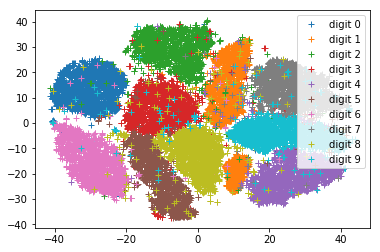

K Size 2
trial 0
trial 1
trial 2
trial 3
trial 4
trial 5
trial 6
trial 7
trial 8
trial 9
K Size 4
trial 0
trial 1
trial 2
trial 3
trial 4
trial 5
trial 6
trial 7
trial 8
trial 9
K Size 8
trial 0
trial 1
trial 2
trial 3
trial 4
trial 5
trial 6
trial 7
trial 8
trial 9


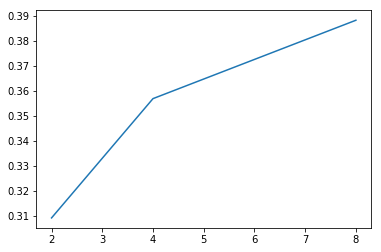

In [6]:
print ("Experiment")
one = MyKmeans()
one.readData('mnist.csv')
one.plotData()
expriment(one)